In [9]:
import librosa
import librosa.display
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

In [10]:
y, sr = librosa.load('c:/nmb/nmb_data/M2.wav')

print(len(y))
print(sr)

110250
22050


In [11]:
y_down = librosa.effects.pitch_shift(y, sr, n_steps = -4)
y_up = librosa.effects.pitch_shift(y, sr, n_steps = 4)

In [12]:
# sf.write('c:/nmb/nmb_data/M2_octave_down.wav', y, sr)

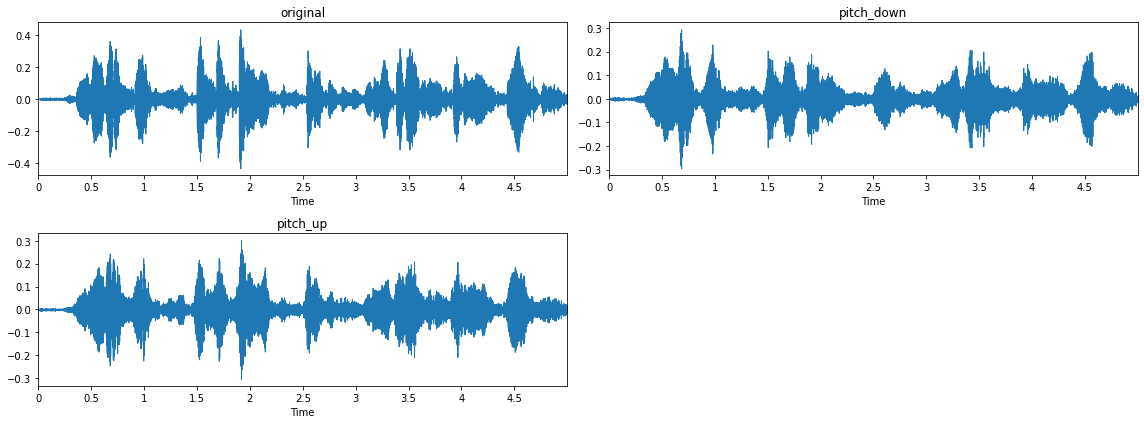

In [14]:
fig = plt.figure(figsize = (16, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

librosa.display.waveplot(y, sr, ax = ax1)
librosa.display.waveplot(y_down, sr, ax = ax2)
librosa.display.waveplot(y_up, sr, ax = ax3)

ax1.set(title = 'original')
ax2.set(title = 'pitch_down')
ax3.set(title = 'pitch_up')

fig.tight_layout()
plt.show()

In [15]:
mel_y = librosa.feature.melspectrogram(y, sr, n_fft = 512, hop_length = 128, win_length=512)
mel_y = librosa.amplitude_to_db(mel_y, ref = np.max)
mel_y_down = librosa.feature.melspectrogram(y_down, sr, n_fft=512, hop_length=128, win_length=512)
mel_y_down = librosa.amplitude_to_db(mel_y_down, ref = np.max)
mel_y_up = librosa.feature.melspectrogram(y_up, sr, n_fft=512, hop_length=128, win_length=512)
mel_y_up = librosa.amplitude_to_db(mel_y_up, ref = np.max)

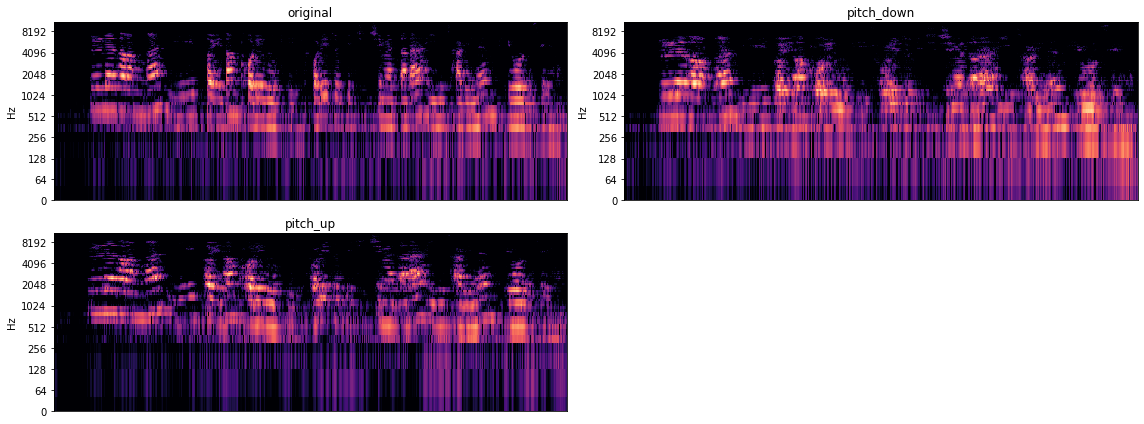

In [17]:
fig = plt.figure(figsize = (16, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

librosa.display.specshow(mel_y, y_axis='log', ax = ax1)
librosa.display.specshow(mel_y_down, y_axis='log', ax = ax2)
librosa.display.specshow(mel_y_up, y_axis='log', ax = ax3)

ax1.set(title = 'original')
ax2.set(title='pitch_down')
ax3.set(title = 'pitch_up')

fig.tight_layout()
plt.show()